# Introducción
## Manipulación de imágenes

### Objetivo

Este cuaderno introduce cómo leer, escribir y manipular imágenes con Python. 

### Paquetes

Para tratar con imágenes en Python, necesitaremos varios paquetes :

- numpy
- matplotlib (para visualizar)
- imageio (para leer y guardar)
- scikit-image (para la conversión de color a RGB)

Primero, importamos los paquetes necesarios :

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import imageio
from skimage import color

In [11]:
import os
from google.colab import drive 
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Cosas/computer_vision/')

Mounted at /content/drive/


## Lectura de imágenes

Hay varios paquetes que permiten leer y escribir imágenes. En este caso, elegimos utilizar el paquete ``imageio``.

Lee la imagen contenida en este directorio (de un gato) con el siguiente código :

In [12]:
file_name = 'images/cat.png'
img_in = imageio.imread(file_name)

El resultado de esto es un array numpy. Ahora podemos inspeccionar la forma de la imagen, el valor de un píxel y el tipo de datos:

In [13]:
print('image shape : ', img_in.shape)
print('an image pixel : ',img_in[0,0,:])
print('data type : ',img_in.dtype)

image shape :  (317, 475, 3)
an image pixel :  [70 70 42]
data type :  uint8


Como podemos ver, la imagen consta de tres matrices: una para cada canal de color. Podemos encontrar el rango de todos los datos de los píxeles. Como los píxeles son enteros sin signo codificados en 8 bits (uint8), los valores de los píxeles están entre 0 y 255.

In [14]:
print('Max value : ', img_in.max())
print('Min value : ', img_in.min())

Max value :  244
Min value :  0


Como podemos ver en esta imagen, no se alcanza el límite superior. 

¿Qué podemos hacer si deseamos trabajar con imágenes en escala de grises?

Podemos convertir los píxeles (que son tres escalares) en un escalar de nivel de grises. Esto se puede hacer de la siguiente manera

In [15]:
img_gray = color.rgb2gray(img_in)
print('Grey-level image data shape : ', img_gray.shape)
print('Grey-level image data type : ', img_gray.dtype)

Grey-level image data shape :  (317, 475)
Grey-level image data type :  float64


Como puede ver, esta nueva imagen sólo tiene un canal, como se esperaba, y el tipo de datos es ahora float.

## Visualización de imágenes

Las imágenes se pueden visualizar en Python con el paquete matplotlib. Cuando se muestra una imagen, el ordenador debe saber cuál es el rango de los valores de los píxeles, para poder mapear correctamente estos valores a los píxeles reales que vemos en la pantalla.

En el caso de las imágenes en color, de tipo uint8, el ordenador sabe cómo hacerlo automáticamente. Muestra la imagen con la función imshow :

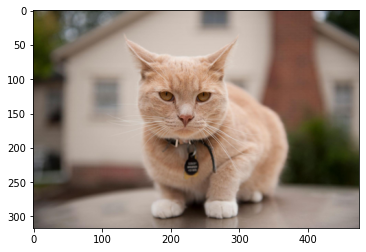

In [16]:
plt.imshow(img_in)

Sin embargo, en el caso de nuestra imagen en escala de grises, que está codificada como flotantes, no está necesariamente claro cuál debe ser la dinámica. Por lo tanto, es necesario indicar al ordenador que se trata efectivamente de una imagen en escala de grises. El siguiente código muestra la imagen con el rango de los píxeles convertido a $0 \dots 1$

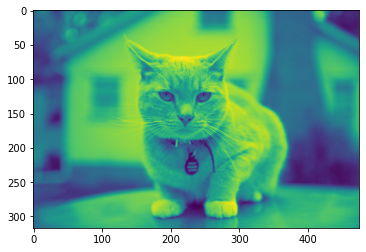

In [31]:
plt.imshow(img_gray,cmap='gray')

## Manipulación de imágenes

Ahora, como nuestra imagen (en escala de grises) es simplemente una matriz, podemos tomar partes de la imagen y trabajar sobre ellas: 

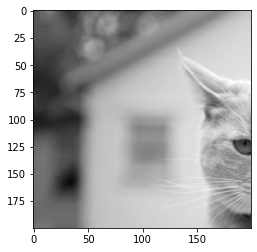

In [17]:
img_crop = img_gray[0:200,0:200]
plt.imshow(img_crop,cmap='gray')

Podemos cambiar ciertos valores de los píxeles, por ejemplo, poniendo a 0 los valores bajos de los píxeles

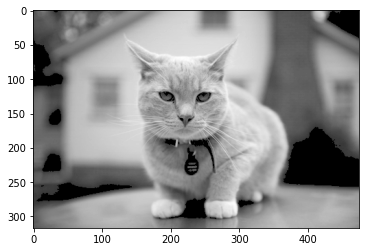

In [18]:
img_modified = img_gray.copy()
img_modified[img_modified<0.2] = 0.0
plt.imshow(img_modified,cmap='gray')

### Histogramas

A menudo es necesario encontrar la distribución (histograma) de los valores de los píxeles en una imagen. Esto se puede hacer con la siguiente función

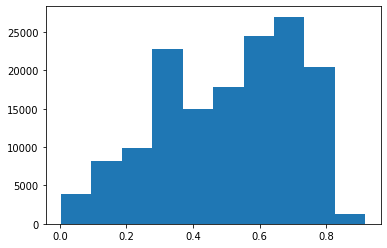

In [21]:
_ = plt.hist(img_gray.flatten())

Como puede ver, el número de bins en el histograma es demasiado pequeño aquí. Puede controlar el número de bins con la opción ``nbins``:

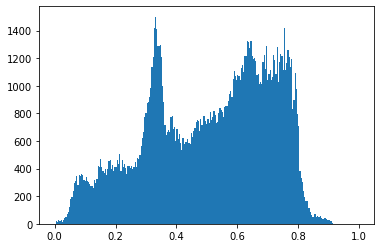

In [22]:
_ = plt.hist(img_gray.flatten(), bins=np.linspace(0,1,256))

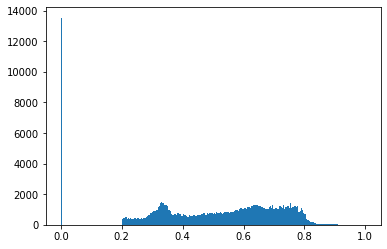

In [23]:
_ = plt.hist(img_modified.flatten(), bins=np.linspace(0,1,256))

Puedes ver que el ``img_modified`` contiene un pico en 0. Aquí es donde ponemos los valores de la imagen a 0. Si quieres los valores reales del histograma, y no quieres la visualización de matplotlib, puedes encontrarlos con ``np.histogram``:

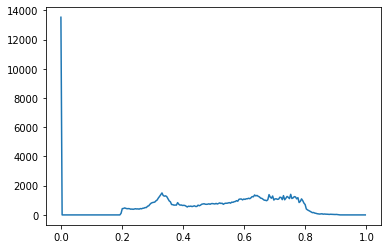

In [24]:
hist_vals, hist_bins = np.histogram(img_modified.flatten(), bins=np.linspace(0,1,255))
plt.plot(hist_bins[0:-1],hist_vals)

Nota: el tamaño de hist_bins e hist_vals no es el mismo: se incluye el final del último bin, por lo que hist_bins es uno más grande

## Escribir imágenes

Puedes escribir imágenes con la función ``imageio.imwrite``. Ten cuidado, por definición, las imágenes se supone que tienen valores uint8, entre 0 y 255

# Introducción a opencv


--2021-10-16 12:42:02--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.005s  

2021-10-16 12:42:02 (14.1 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2021-10-16 12:42:02--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

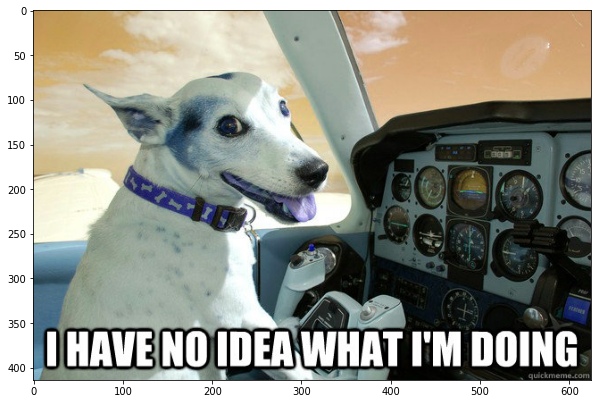

In [35]:


# descargar imagenes
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

import cv2 #opencv
import common 
import numpy as np 

#lo siguiente tiene que ver con el código de este cuaderno interactivo
%matplotlib inline 
from matplotlib import pyplot as plt # esto permite dibujar figuras en línea en los cuadernos
import pylab # esto te permite controlar el tamaño de las figuras 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # esto controla el tamaño de la figura en el cuaderno

input_image=cv2.imread('noidea.jpg')

plt.imshow(input_image)

## Rotaciones

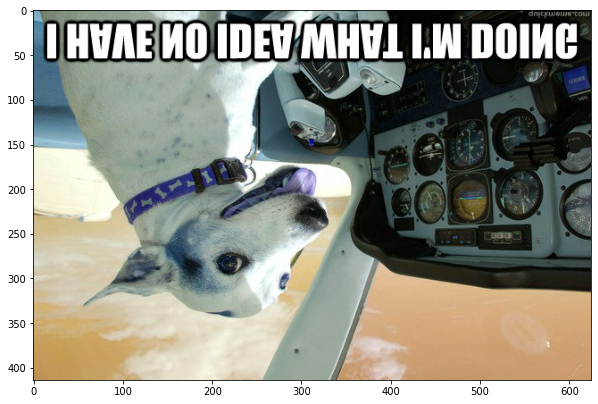

In [34]:
flipped_code_0 = cv2.flip(input_image,0) # flip vertical
plt.imshow(flipped_code_0)


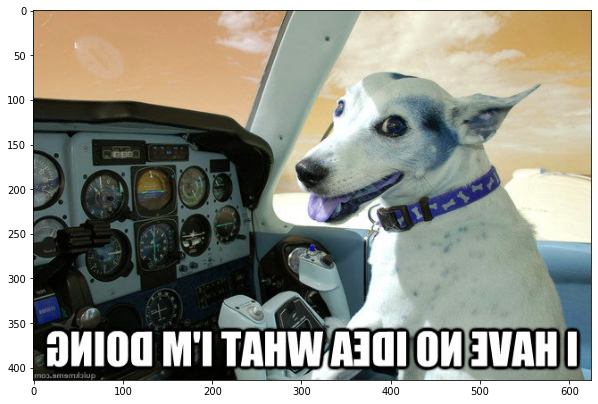

In [36]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

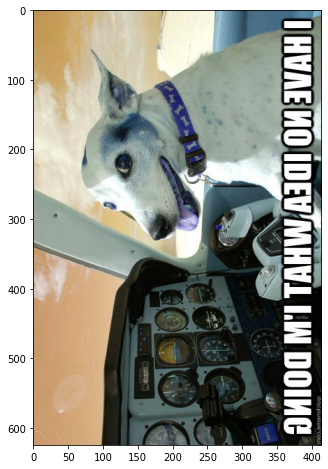

In [37]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Mínimo, máximo

Para encontrar el mínimo o el máximo de una matriz, puedes utilizar minMaxLoc. Esto toma una imagen de un solo canal (no tiene mucho sentido tomar el máximo de una imagen de 3 canales). Así que en el siguiente fragmento de código se ve un bucle for, utilizando el estilo de python de corte de imágenes, para mirar cada canal de la imagen de entrada por separado.

In [40]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} es en {}, y max {} es en {}".format(min_value, min_location, max_value, max_location))

min 0.0 es en (175, 117), y max 255.0 es en (577, 37)
min 0.0 es en (446, 146), y max 255.0 es en (257, 81)
min 0.0 es en (524, 122), y max 255.0 es en (257, 81)


## Operaciones aritméticas sobre imágenes

OpenCV tiene muchas funciones para realizar operaciones matemáticas sobre las imágenes. Algunas de ellas tienen alternativas "análogas" a numpy, pero casi siempre es mejor usar la versión de OpenCV. La razón de esto es que OpenCV está diseñado para trabajar en imágenes y por lo tanto maneja mejor el desbordamiento (OpenCV add, por ejemplo, trunca a 255 si el tipo de datos es de imagen y 8 bits; la alternativa de Numpy envuelve).

Las operaciones aritméticas útiles incluyen add y addWeighted, que combinan dos imágenes del mismo tamaño.


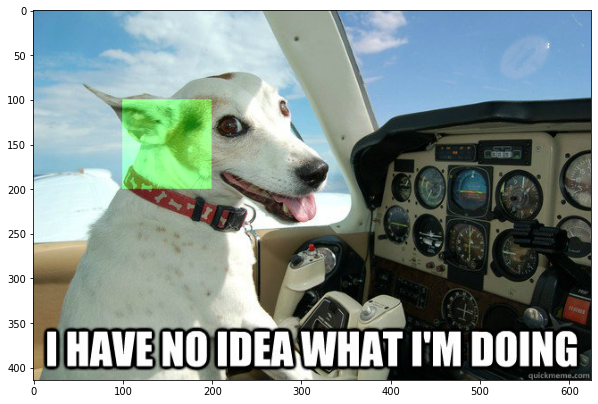

In [41]:
#Primero creamos una imagen del mismo tamaño que nuestra entrada
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #darle un cuadrado verde

new_image=cv2.add(blank_image,input_image) #suma las dos imágenes

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


## Reducción del ruido

La reducción de ruido suele consistir en difuminar o suavizar una imagen mediante un núcleo gaussiano. La anchura del núcleo determina la cantidad de suavizado.


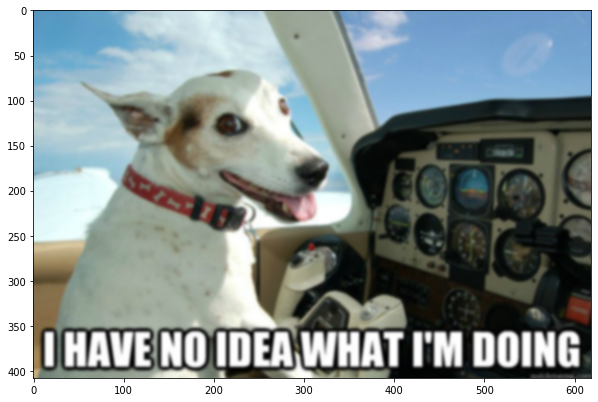

In [42]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

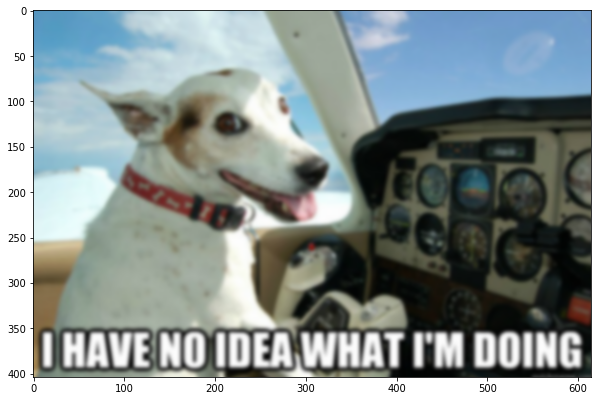

In [43]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))



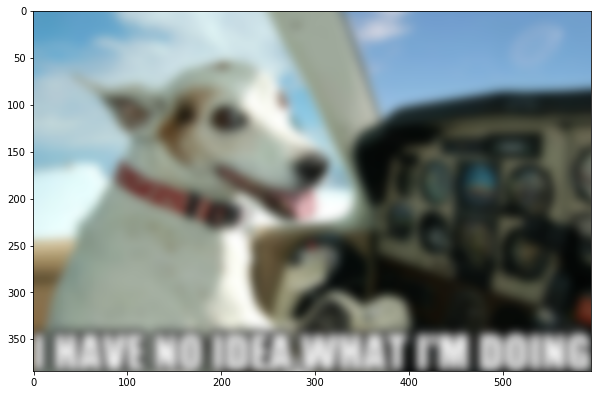

In [44]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

## Bordes

Para muchas de las técnicas de visión por ordenador "modernas", la detección de bordes funciona como un bloque de construcción. Gran parte de la detección de bordes funciona por convolución, y de hecho las redes neuronales convolucionales son usadas en algunas partes de la visión por ordenador. El detector de bordes de Sobel fue una de las primeras técnicas de detección de bordes (de mejora) realmente exitosas y que implica la convolución en su núcleo

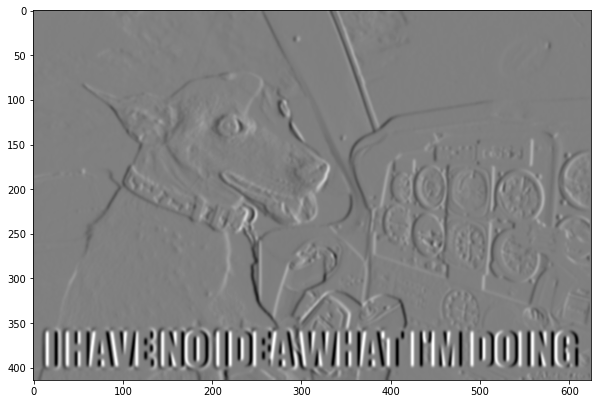

In [45]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
# Sobel funciona en x y en y, cambia sobelx por sobely en la línea olt de arriba para ver la diferencia



La detección de bordes de Canny es otra técnica ganadora: toma dos umbrales. El primero determina la probabilidad de que Canny encuentre una arista, y el segundo determina la probabilidad de que siga esa arista una vez encontrada. Investiga el efecto de estos umbrales alterando los valores de abajo.

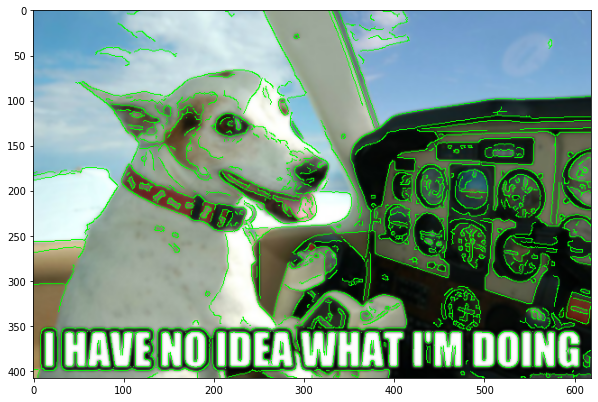

In [48]:
th1=30
th2=60 # Canny recomienda que el umbral 2 sea 3 veces el umbral 1 - podría probar a experimentar con esto...
d=3 # desenfoque gaussiano

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # esto toma los píxeles en edgeresult donde edge no es cero los colorea en verde brillante

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))


## Detectores de esquinas

Si pensamos que los bordes son líneas, las esquinas son una opción obvia para las características, ya que representan la intersección de dos líneas. Uno de los primeros detectores de esquinas fue introducido por Harris, y sigue siendo un detector de esquinas muy eficaz que se utiliza bastante: es fiable y rápido. 

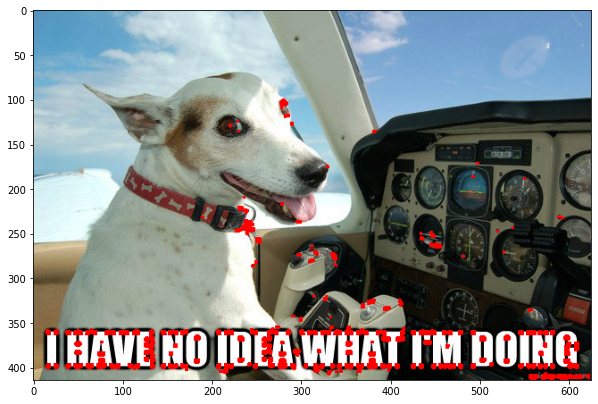

In [50]:
harris_test= input_image.copy()
#escala de grises
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blockize=4 # 
kernel_size=3 # kernel sobel: debe ser impar y bastante pequeño

# ejecutar el detector de esquinas de harris
dst = cv2.cornerHarris(gray,blockize,kernel_size,0.05) # los parámetros son el tamaño del bloque, el parámetro Sobel y el umbral Harris

#el resultado se dilata para marcar las esquinas, esto está relacionado con la visualización y simplemente las hace más grandes
dst = cv2.dilate(dst,None)
#Luego trazamos estos resultados en la imagen de entrada para su visualización, utilizando un color rojo brillante
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

Hablando con propiedad, la detección de esquinas de Harris se parece más a un operador Sobel, de hecho se parece mucho a un operador Sobel. En realidad, no devuelve un conjunto de características, sino que es un filtro que da una respuesta fuerte en las regiones de la imagen con esquinas. Podemos ver esto más claramente si miramos la salida de Harris de la celda de arriba (dst es la respuesta de Harris, antes del umbral). Bueno, podemos ver más o menos. Deberíamos poder ver que hay lugares ligeramente claros en la imagen donde hay rasgos parecidos a las esquinas, y que hay partes realmente claras de la imagen alrededor de las esquinas blancas y negras de la escritura.